# 卷积神经网络基础

## 1. 计算机视觉

随着深度学习的兴起，近些年来计算机视觉领域的发展十分迅猛。一方面，深度学习在计算机视觉的应用，使得很多几年前还无法解决的领域问题得以解决，比如人脸识别、自动驾驶；另一方面，在实践中计算机视觉社区对深度学习技巧的发现，也常常可以应用到其它领域里。

计算机视觉领域的典型问题，包括图片分类、物体检测、神经风格迁移等。

![Computer Vision Problems.png](img/Computer Vision Problems.png)

由于图像数据的特点（高分辨率，特征多），非常容易多拟合，同时针对图像数据训练模型也需要极大的计算资源。而要使用高分辨率的图片训练模型，最好要实现卷积，卷积是卷积神经网络的基本组成单元。

![Deep Learning on large images.png](img/Deep Learning on large images.png)

## 2. 边缘检测实例

在之前介绍的人类识别神经网络中，我们发现最终训练完成的神经网络会首先形成边缘检测的底层特征，在此基础上继续构建五官检测，进而再到人脸检测。可以说边缘检测是非常基础性的步骤。

![Computer Vision Problem.png](img/Computer Vision Problem.png)

卷积操作可以有效地进行边缘检测。卷积计算用到的这个3×3的矩阵，称为**过滤器 filter**，有些文献中也称为**核 kernel**。

![Vertical edge detection.png](img/Vertical edge detection.png)

卷积操作检测出来的边缘看起来比较粗，当输入图片的分辨率非常高时，这点损耗可以忽略不计。

![Vertical edge detection 2.png](img/Vertical edge detection 2.png)

## 3. 更多边缘检测的内容

上面提到的过滤器，还可以区分由浅到深的边缘和由深到浅的边缘。

![Vertical edge detection examples.png](img/Vertical edge detection examples.png)

而将这个过滤器的矩阵转置，就是水平边缘检测的过滤器。

![Vertical and Horizontal Edge Detection.png](img/Vertical and Horizontal Edge Detection.png)

除去水平边缘和垂直边缘过滤器外，计算机视觉社区还发明过Sober过滤器和Scharr过滤器，它们分别有一些自己的特性。而在深度学习时代，一个非常重要的理念是，过滤器本身可以作为神经网络的参数，在反向传播的过程中进行学习。这样最终学得的边缘检测过滤器，可能不限于水平或垂直边缘，而是可以检测任意倾斜的边缘。

![Learning to detect edges.png](img/Learning to detect edges.png)

## 4. 补全

经过卷积操作，图片的分辨率会降低。如果原图是n×n的矩阵，而过滤器是f×f的矩阵，卷积之后的矩阵就变为了(n-f+1)×(n-f+1)维。这样有两个坏处：1）随着每一层神经网络的卷积计算，图片的大小都在不断缩小，限制了训练过大的神经网络；2）角和边上的像素点，参与卷积计算的次数会更少，从而造成边角的信息利用率低。所以实际使用中，卷积通常伴随着补全。

![Padding.png](img/Padding.png)

根据使用补全的策略，区分**正确卷积 Valid convolution**和**同一卷积 Same convolution**。所谓正确卷积，就是不包含补全，任由图片大小缩减；而同一卷积，是先进行补全，使得最终输出的图片大小和输入一致。注意要同一卷积的要求，使得 $p=\frac{f-1}{2}$。这就要求过滤器是一个奇数维的矩阵，否则补全就需要是非对称的。过滤器是奇数维矩阵的另一个好处，是过滤器存在一个中心像素，方便定位位置。

![Valid and Same convolutions.png](img/Valid and Same convolutions.png)

## 5. 步长

前面看到的卷积操作，过滤器每次都只移动一格。而引入步长的概念之后，过滤器每次可以移动不只一格。

![Strided convolution.png](img/Strided convolution.png)

在有补全和步长的情况下，输出的数据量大小也会有所变化。

![Summary of convolutions.png](img/Summary of convolutions.png)

从严格数学的定义来说，实际上我们上面用到的应该称为**交叉相关性 cross-correlation**，而真正的卷积，在交叉相关性之前，还需要先进行垂直和水平的翻转，这样可以使得卷积服从结合律。不过这个特性对于神经网络意义不大（对于信号处理中使用卷积比较有用），所以在深度学习社区，实际上使用卷积时，并不会进行翻转，但是从命名习惯上，依然将其称之为卷积。

![Technical note on cross-correlation vs convolution.png](img/Technical note on cross-correlation vs convolution.png)

## 6. 高维空间的卷积

对于图片，如果要处理RGB值，就会有三个n×n的矩阵，形成一个n×n×3的立方体，这时相应的，过滤器也变成了一个f×f×3的立方体，最终输出仍然是一个矩阵。

![Convolutions on RGB image.png](img/Convolutions on RGB image.png)

在需要的情况下，也可以同时使用多个过滤器。

![Multiple filters.png](img/Multiple filters.png)

## 7. 一层卷积神经网络

![Example of a layer.png](img/Example of a layer.png)

![Summary of notation.png](img/Summary of notation.png)

## 8. 简单的卷积神经网络示例

一个39×39像素，RGB三通道表示的图片，经过三个卷积层，最后叠加一层logistic或softmax的卷机神经网络分类模型。注意到随着层数的增加，图片的像素在下降，而通道数在上升，这也是超参选择（每一层的过滤器大小f，过滤器数量$n_c$，步长s，补全p）的一个普遍趋势。

![Example ConvNet.png](img/Example ConvNet.png)

实际上，一个典型的卷积神经网络，除去卷积层之外，还会包含池化层(Pooling)，完全连接层(Fully connected)。下面会详细介绍。

## 9. 池化层

在过滤器区间内，取最大值，称为最大池化层。

![Pooling layer Max pooling.png](img/Pooling layer Max pooling.png)

池化层和卷积层的一个显著不同，是池化层的过滤器是针对通道独立的，不会跨通道取最大值。过滤器也包含两个超参，分别是f过滤器大小和步长s。注意和卷积层的另一个不同，是池化层的过滤器，只有超参，没有参数。所以在反向传播的过程中，这一层是没有更新的。

![Pooling layer Max pooling 2.png](img/Pooling layer Max pooling 2.png)

同时也有平均池化层，但平均池化层不常用。

![Pooling layer Average pooling.png](img/Pooling layer Average pooling.png)

## 10. 卷积神经网络实例

上面说到，池化层是没有需要学习的参数的，而且池化层通常会跟在一层或多层卷积层之后，所以习惯上会将卷积层和池化层一起称为神经网络的一层。而所谓的完全连接层FC，就是普通的神经网络的一层，有权重和截距作为参数。

下图是一个卷积-池化-卷积-池化-全连接-全连接-全连接-Softmax的卷积神经网络的例子。设计良好的卷积神经网络架构，每一层激活值的数量在前向传播的过程中，通常是逐渐递减的。

![Convolution Neural Network Example.png](img/Convolution Neural Network Example.png)

## 11. 为何卷积有效

卷积层相比全连接层，需要学习的参数大幅减少，有以下两个原因：
    - 参数共享：一个特征检测器（比如垂直边缘检测器），可能不只对图像的单一区域有效。过滤器平移的过程，就是参数共享的过程。
    - 连接的稀疏性：每一层的输出值都只依赖与几个输入值。（与全连接层相比，所有输入和所有输出都是连通的）
    
![Why convolutions.png](img/Why convolutions.png)

## 12. 卷积神经网络：一步一步地搭建卷积模型

这里我们将使用numpy来实现卷积神经网络的卷积层（CONV）和池化层（POOL），前向传播与反向传播。

**标记**:
- 上标 $[l]$ 表示第 $l^{th}$ 层的对应变量。 
    - 举例: $a^{[4]}$ 是第 $4^{th}$ 层激活层。 $W^{[5]}$ 和 $b^{[5]}$ 是第 $5^{th}$ 层的参数。


- 上标 $(i)$ 表示第 $i^{th}$ 个样本的对应变量。 
    - 举例: $x^{(i)}$ 是第 $i^{th}$ 个训练样本的输入。
    
    
- 下标 $i$ 表示向量的第 $i^{th}$ 个元素。
    - 举例: $a^{[l]}_i$ 表示第 $l$ 层的激活值的第 $i^{th}$ 个元素，假定这一层是全连接层（FC）。
    
    
- $n_H$, $n_W$ 和 $n_C$ 分别表示给定层的高度、宽度和通道数。当需要确定地表示是第 $l$ 层时，可以写作
$n_H^{[l]}$, $n_W^{[l]}$, $n_C^{[l]}$。
- $n_{H_{prev}}$, $n_{W_{prev}}$ 和 $n_{C_{prev}}$ 分别表示上一层的高度、宽度和通道数。当需要确定地表示是第 $l$ 层对应的前一层相应参数时，可以写作 $n_H^{[l-1]}$, $n_W^{[l-1]}$, $n_C^{[l-1]}$。

### 12.1 三方包

首先引入在这个编程练习中所需要的包。
- [numpy](www.numpy.org) 是Python生态圈中进行科学计算的基础包。
- [matplotlib](http://matplotlib.org) 是Python生态圈中著名的绘图包。
- np.random.seed(1) 用来保证所有函数调用中随机部分的一致性。

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

### 12.2 总览

我们将会实现卷积神经网络的各个组件：

- 卷积函数，包括：
    - 零补全 Zero Padding
    - 卷积窗口 Convolve window 
    - 前向卷积 Convolution forward
    - 反向卷积 Convolution backward (optional)
- 池化函数，包括:
    - 前向池化 Pooling forward
    - 创建掩码 Create mask 
    - 分布值 Distribute value
    - 反向池化 Pooling backward (optional)

这一节的内容都基于 `numpy` 从头开始实现；而在下一节中，我们会用Tensorflow来实现同样的模型。

<img src="img/model.png" style="width:800px;height:300px;">

**注意** 每一个前向传播的函数，都有对应的反向传播的函数。因此，前向传播模块中的每一步，都需要将相应的参数保存到缓存中。这些参数将在反向传播过程中用于计算梯度。

### 12.3 卷积神经网络

编程框架使得卷积非常容易使用，但卷积的概念依然是深度学习中最难理解的概念之一。卷积层将输入立方体转换为另一个尺寸的输出立方体，如下图所示：

<img src="img/conv_nn.png" style="width:350px;height:200px;">

在这一节，我们会逐步构建起一个完整的卷积层。首先，我们需要实现两个辅助函数：零补全和卷积计算。

#### 12.3.1 零补全

零补全围绕着图像的边框补零值：

<img src="img/PAD.png" style="width:600px;height:400px;">
<caption><center> <u> <font color='purple'> **Figure 1** </u><font color='purple'>  : **Zero-Padding**<br> Image (3 channels, RGB) with a padding of 2. </center></caption>

补全的主要好处包括：

- 使用卷积层时，高度和宽度不会缩减，这点对于构建深度网络来说十分重要。而一个重要的应用实例就是同一补全的卷积层，卷积计算前后，高度和宽度都不变。

- 使得图片边框的信息得到充分利用。没有补全时，下一层只有很少的数值会收到当前图片的边角像素的影响。

**练习**: 实现下面的函数，批量将样本 X 进行零补全。[使用 np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)。注意到如果想要给形状为 $(5,5,5,5,5)$ 的数组 "a" 在第二维度补 1，在第四维度补 3，其它维度补 0，可以这样写：
```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), 'constant', constant_values = (..,..))
```

In [2]:
# GRADED FUNCTION: zero_pad

def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant')
    ### END CODE HERE ###
    
    return X_pad

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


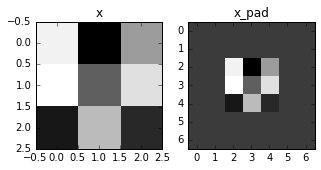

In [3]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

**预期输出**:

<table>
    <tr>
        <td>
            **x.shape**:
        </td>
        <td>
           (4, 3, 3, 2)
        </td>
    </tr>
        <tr>
        <td>
            **x_pad.shape**:
        </td>
        <td>
           (4, 7, 7, 2)
        </td>
    </tr>
        <tr>
        <td>
            **x[1,1]**:
        </td>
        <td>
           [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
        </td>
    </tr>
        <tr>
        <td>
            **x_pad[1,1]**:
        </td>
        <td>
           [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
        </td>
    </tr>

</table>